In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Task 1. 

### Function to calculate the number of possible ways to choose a sample size of 250: 

In order to do this we can apply a formula from combinarotics which calculates the total number of possible ways to select K items from a bucket of N items where the order of the K items is irrelevant. 

N choose K can be written as $ \binom{N}{K}$, and the formula for it is given as: 

$$  \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

This is because $n!$ is the number of possible ways to arange $n$ items, $(n-k)!$ is the number of possible ways to arrange rest of the non k items, so by dividing $n!$ by $(n-k)!$ we calculate the number of possible ways to select $k$ items from $n$ where order is important. However if order is unimportant we divide the number of possible ways to select $k$ from $n$ where order matters by the number of possible ways to order $k$ items which is $k!$. 

### Python Implementation 

In order to implement this function in python we first need a function which can calculate factorials, below I have written a function to generate factorials using the recurisve formula  

In [3]:
def fact(n): 
    if n ==1: 
        return 1 

    return n*fact(n-1) 

Plugging in the factorial function to our n choose k function. 

In [4]:
def nCk(n,k): 

    return fact(n) / ( fact(k) * fact(n-k) ) 

k is equal to 250 as its the size of our desired samples, but to calculate n we need to figure out how many users exist in our population of Klout scores. 

In [5]:
df = pd.read_csv('KloutScores.csv') 
df

,scores
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690
...,...
1043,28.544280
1044,16.647022
1045,40.078943
1046,51.085002


In [6]:
print(f'there is {len(df)} total users') 

there is 1048 total users


Plugging in n=1048 and k-250 

In [7]:
nCk(n=1048, k=250) 

3.2830569965061e+248

Hence the total number of possible unique samples is  $ \approx 3.3\times{10^{248}} $ 

## Generating random samples 

Below is a function to generate random samples from a list of data, using NumPys ```np.random.choice``` function which randomly selects k items from a list provided. 

In [8]:
def generate_random_samples(data, num_samples, sample_size): 
    samples = [np.random.choice(data, sample_size )  for i in range(num_samples) ]
    return np.array(samples ) 

## Plotting distribution of Klout scores 

First we will begin by simply plotting the distribution of the raw scores, using a bin size of 30 

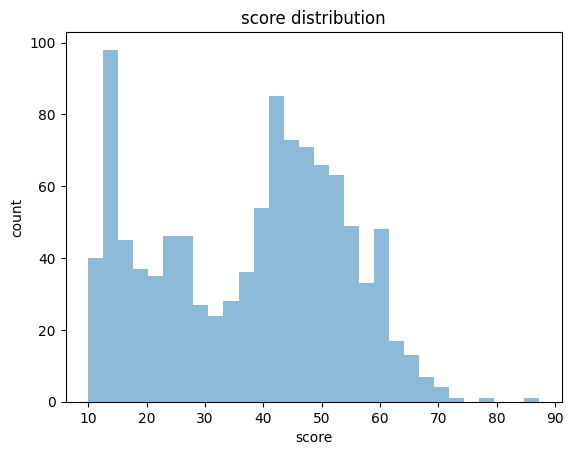

In [9]:
plt.title('score distribution') 
plt.xlabel('score') 
plt.ylabel('count') 
plt.hist(df.scores, bins = 30 , alpha = 0.5 ); 

To plot the distribution of sample means, we will take 1000 samples and compute the mean of each 

In [10]:
samples = generate_random_samples(df.values.flatten() , 1000, 250) 
samples

array([[44.02310472, 26.77886166, 30.50200223, ..., 53.77748514,
        11.85898996, 36.89084737],
       [26.16048929, 28.54427955, 32.45733265, ..., 12.01085146,
        12.91298717, 12.49793187],
       [31.96023186, 13.50630128, 59.01915744, ..., 57.506651  ,
        17.74808672, 42.42959206],
       ...,
       [18.59887672, 50.1709539 , 60.46770137, ..., 40.34875883,
        34.9734798 , 36.0076138 ],
       [41.19121108, 61.23531358, 55.17366954, ..., 36.0076138 ,
        15.7174851 , 13.95435098],
       [10.        , 36.0076138 , 52.16664368, ..., 52.63936502,
        13.31233025, 29.6756219 ]], shape=(1000, 250))

In [11]:
samples.shape 

(1000, 250)

By inspect the shape of the `samples` array we can see that we have 1000 samples each with 250 values. 

Calculating the mean of each sample to produce the distribution of sample means 

In [12]:
sample_mean_dist = np.mean(samples, axis = 1) 

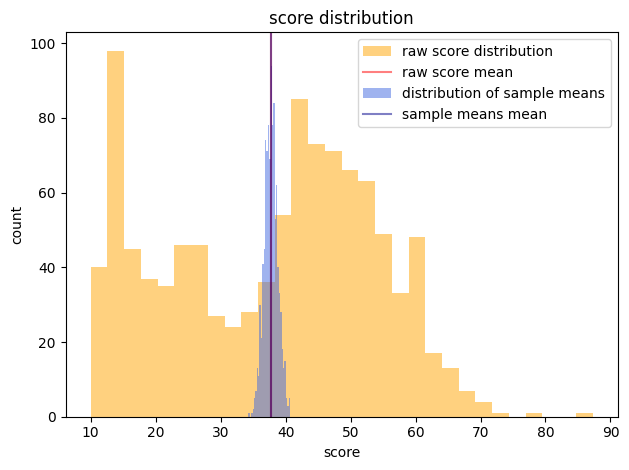

In [13]:
plt.title('score distribution') 
plt.xlabel('score') 
plt.ylabel('count') 
plt.hist(df.scores, bins= 30, alpha = 0.5, label = 'raw score distribution', color = 'orange'  )
plt.axvline(np.mean(df.scores), label = 'raw score mean', color = 'red', alpha = 0.5  ) 
plt.hist(sample_mean_dist, bins = 30 , alpha = 0.5, label = 'distribution of sample means', color = 'royalblue' )
plt.axvline(np.mean(np.mean(df.scores)) , label = 'sample means mean', color = 'darkblue', alpha = 0.5   ) 
plt.tight_layout() 
plt.legend() ; 

### Distribution of sample means 

There are three main things we can pick out about the distribution of sample means which is plotted in blue on the figure above. 

The first is that the distribution of sample means seems to follow a normal distribution pattern with the majority of the sample means being centered around the mean of the sample means and then the frequency of data points starts to tail off either side of the mean of sample means.  

THe second is that the standard deviation of the distribution of sample means is far smaller when compared to the distribution of raw scores which is to be expected. 

Thirdly, the mean of the raw scores as well as the mean of the sample means are the same/very similar,  which is represnted by the overlapping of the red line (raw score mean) and blue line (sample means mean) to creating a purple line which is the centre of the normal distribution which describes the distribution of sample means. 

### Proving results about the distributions of sample means 

Below I explain the mathematical proofs behind how the mean of the original and sampling distributions are the same as well as the reduced standard deviation. 

Let $X \sim \mathcal{N}(\mu,\,\sigma^{2})$ where $x_1, x_2, x_3, ... , x_i$ are all independent random variables sampled from a distribution / population with a mean of $\mu$ and variance $\sigma ^2 $ 

Let $\bar{X}$ be the distribution of sample means where $n$ is equal to the sample size: 

$$ \bar{X} = \left( \frac{x_1 + x_2 + ... + x_n}{n}  \right) $$

Calculating the expected value/ mean for distribution $\bar{X}$, using [expectation algebra](https://en.wikipedia.org/wiki/Algebra_of_random_variables): 

$$ E(\bar{X}) = E\left( \frac{x_1 + x_2 + ... + x_) }{n}  \right )$$ 

Given that ... (reference a rule ) 

$$ E(\bar{X}) = \left( \frac{ E(x_1) + E(x_2) + ... + E(x_n) }{n}  \right )$$ 

Given that $x_k$ is sampled from a normal distribution with a mean of $\mu$, so the expected value of $x_k$ is $\mu$. $E(x_k) = \mu $ 

$$ E(\bar{X}) = \frac{1}{n}( \underbrace{ \mu + \mu + ... + \mu }_{n\text{-times}}  )$$ 

Rewriting our summation as a multiplication: 

$$ E(\bar{X}) = \frac{1}{n}( n\mu )$$ 

Simplifying: 

$$ E(\bar{X}) = \mu $$

### proving the result for the standard deviation 

To calculate the standard deviation of $\bar{X}$  we will apply the two following [Variance Algebra](https://en.wikipedia.org/wiki/Algebra_of_random_variables) rules: 

$$ VAR \left(x_1 + x_2 + ... + x_n \right) = VAR(x_1) + VAR(x_2) + ... + VAR(x_n)  $$

$$ VAR \left(aX  \right)  = a^{2}VAR(X) $$ 

Hence we wish to calcualte : $VAR(\bar{X} ) $ 

$$ VAR(\bar{X} )  = VAR \left(\frac{x_1 + x_2 + ... + x_n }{n } \right ) $$

Applying both of the variance algebra rules above gives us the following: 

$$ VAR(\bar{X} )  = \frac{ VAR(x_1 )+ VAR(x_2) + ... + VAR(x_n) }{n^{2}}  $$ 

The expected variance for an individual sample ( the average distance squared for the mean ) can be defiend by the variance of the the distribtuion $X$ which are observations are sampled from.

$$ VAR(X) = \sigma^{2}   $$ 

Subbing the results into our above equation: 

$$ VAR(\bar{X} )  =  \frac{1}{n^{2}} \left (\underbrace{ \sigma^{2} + \sigma^{2} + ... +  \sigma^{2} }_{n\text{-times}} \right )  $$ 

Converting our summation into a multiplication: 

$$ VAR(\bar{X} )  =  \frac{1}{n^2} \left ( n \sigma^{2}  \right )  $$ 

$$ VAR(\bar{X} ) =  \frac{\sigma^{2} }{n} $$ 

The expected station deviation is the square root of the variance. 

$$ \sigma(\bar{X}) = \frac{\sigma}{\sqrt{n} } $$ 


Calculating the mean and standard deviation of the normal distribution describing the distribution of sample means using the formulas dervived above. 

In [14]:
original_mean = np.mean(df.scores.values) 
original_std = np.std(df.scores.values) 
sample_std = ( original_std / np.sqrt(250)  ) 

In [15]:
print(f'mean of sample means distribution: {round(original_mean, 2) }, std of sample means distribution: {round(sample_std, 4) } ') 

mean of sample means distribution: 37.72, std of sample means distribution: 1.0142 


###  Comparing the expected values with our observed values 

In [16]:
sample_mean_observed = np.mean(sample_mean_dist) 
sample_std_observed = np.std(sample_mean_dist) 

print(f'mean of sample means distribution: {round(sample_mean_observed, 2) }, std of sample means distribution: {round(sample_std_observed, 4) } ')

mean of sample means distribution: 37.74, std of sample means distribution: 1.0247 


Comparing our observed mean and standard deviation to mathematical formula we can see that our means are the same to 2 decimal places with the standard deviations being slightly difference.

However, the gap between our observed values and ones predicted by the formula would likely shrink as we increase the number of samples until the size of the sample is equal to the size of our population at which point they would be identical. 

TODO : shot a plot with the varying sizes 

## BieberTweetter 

For the sample of BieberTweetters we can say that $n=250$ and $\mu = 40 $

This mean would fall to the right end of the distribution and we see where it fall in the plot below, which shows where it would fall on the histogram of the sample means distrbutions

In [17]:
from scipy.stats import norm 

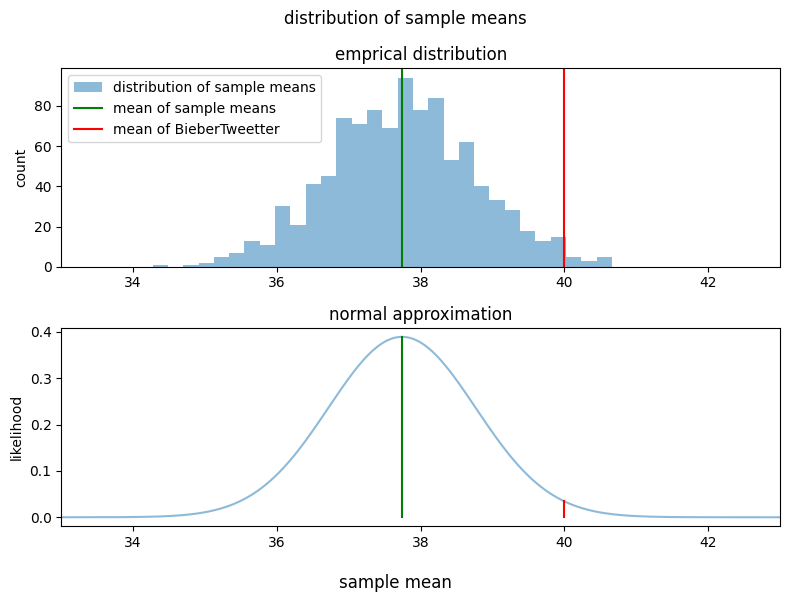

In [18]:
fig, ax = plt.subplots(2, figsize = (8,6  ) )

xmin,xmax = 33, 43 

#plotting the distribution of observed values 
ax[0].hist(sample_mean_dist, bins = 30 , alpha = 0.5 , label = 'distribution of sample means')
ax[0].axvline(np.mean(sample_mean_dist), label = 'mean of sample means', c = 'green'  ) 
ax[0].axvline(40, label =  'mean of BieberTweetter', c = 'red' ) 
ax[0].set_xlim(xmin, xmax ) 
ax[0].set_ylabel('count') 
ax[0].set_title('emprical distribution') 

#plotting the normal approximation to the observed distributions 


x_values = np.linspace(xmin, xmax , 1000)
#initialing a normal distribution 
mean_dist = norm(np.mean(sample_mean_dist) , np.std(sample_mean_dist)  ) 

ax[1].plot( x_values, mean_dist.pdf(x_values), alpha = 0.5   ) 

ax[1].plot( ( np.mean(sample_mean_dist), np.mean(sample_mean_dist) ) ,  ( mean_dist.pdf(37.7)  , 0 )  , c= 'green' ) 
ax[1].plot( (40, 40) , ( mean_dist.pdf(40)   , 0 )  , c= 'red')
ax[1].set_xlim(xmin, xmax) 
ax[1].set_ylabel('likelihood') 
ax[1].set_title('normal approximation') 


#plotting general titles 

midpoint = (fig.subplotpars.right + fig.subplotpars.left ) / 2 
fig.supxlabel('sample mean')
fig.suptitle('distribution of sample means', x = midpoint ) 
fig.tight_layout() 
ax[0].legend(); 

We can see that for both the empirical and normal approximation curve that the a sample mean of 40 compared to other samples of size 250, falls to the right of the distribution and seems quite unlikely given the current mean and standard deviation of mean sample sizes. 

### Likelihood that the mean of a sample is above 40 

Calculating the likelihood that a randomly selected sample of 250 users has a mean of at least 40. This likelihood / probability is represented by the total area underneath the normal distribution where sample means >= 40. 

Below is a plot of the normal approxmation of the distribution of sample means, where the area of the green section represents the probability of a sample having a mean greater than 40. Though its worth noting that this green area extends to infinity as the likelihood tends to zero but for the sake of plotting I have only shown it up to a sample mean of 43 

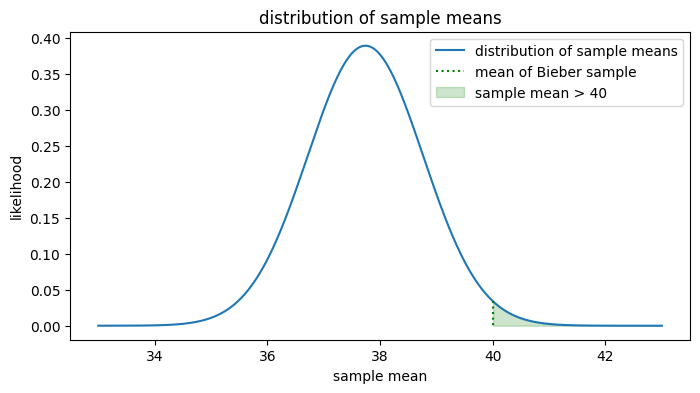

In [19]:
from scipy.stats import norm 
x_values = np.linspace(33, 43 , 1000)
mean_dist = norm(np.mean(sample_mean_dist) , np.std(sample_mean_dist)  ) 

plt.figure(figsize = (8,4)  ) 
plt.plot( x_values, mean_dist.pdf(x_values), label = 'distribution of sample means'  ) 

plt.plot( (40, 40) , ( mean_dist.pdf(40)   , 0 )  , c= 'green', linestyle = ':' , label = 'mean of Bieber sample ')

plt.fill_between( x=  x_values, 
                y1 = mean_dist.pdf(x_values) , 
                where= (x_values >= 40 ) , 
                color= "green",
                alpha= 0.2 , label = 'sample mean > 40 '  ) 

plt.legend()

plt.xlabel('sample mean') 
plt.ylabel('likelihood') 
plt.title('distribution of sample means' );  

Calculating the green area which represents our desrived probability, involves integrating our probability distribution function between the limits of  $40$ and $+\infty$

$$ \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx  $$ 

Where $\mu$ is the mean $\sigma$ is the standard deviation of the distribution of sample means. 

To compute this we can use a SciPys cummulative desnisty function `cdf`, which calculates calcualates the following integral for a given normal distribution paramterised by $\mu$ and $\sigma$. 

$$ \int_{-\infty}^{b} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx  $$ 

Where $b$ the upper limit is the input into the `cdf` function. 

Given that total area under a normal distribution is equal to one we can write: 

$$  \int_{-\infty}^{40} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx   + \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx   =1 $$ 

SciPys `cdf` can be used to compute the first term which we can then substract from 1 to get the green area which represents the probability of a sample having a mean which is at least 40. 

$$   \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx   =1  - \int_{-\infty}^{40} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx $$ 



In [20]:
aoc = (1 - mean_dist.cdf(40) ) 
print(f'the probability that our sample mean is greater or equal to 40 is { round(aoc * 100,2 ) }% ') 

the probability that our sample mean is greater or equal to 40 is 1.37% 


Its quite unlikely that a sample of 250 users would have a mean of 40 or greater. Placing this result in the context of the bieberTweetter sample with a mean of 40, we can say that this result is significant at 5% level to suggest that the mean score of BieberTweetter users is greater than the mean score of all users in our population. 

## Constructing a confidence interval 

We want to create a confidence interval at the 95% for the mean Klout score if everyone  used BieberTwetter. We know thaat a single sample of 250 BieberTweetter users has a mean score of 40.

Confidence intervals can be defined formally as: 

$$ (\mu_s -  me, \mu + me  )$$

$me $ represents the margin of error which is the maximum expected distance between our observed statistic and the true but unknown population population parameter. In our case margin of error represents the maximum expected distance between our sample mean $\mu_s$ of BieberTweetter users and the mean Klout score if everyone used BieberTweetter which is our unknown popluation parameter. 

The margin of error can be defined as the following: 

margin of error = critical value * standard deviation of the sampling distribution if everyone used BieberTweetter. 

The critical value is defined by the confidence level, area between the positive and negative critical value on a standard normal distribution is equal to the confidence level. E.g. for a confidence level of 0.95 / 95% our critical value is 1.96 as: 

$$ \int_{-1.96}^{1.96} \mathcal{N}(0, 1  )(x) \,\,\ dx  = 0.95  $$ 

Given that we want to construct a confidence interval with a confidence of 95% this means that our critical value as displayed above is 1.96.

The the standard deviation of the sampling distribution is multiplied by our critical value in order to scale the critical value to non standard normal distributions with standard deviations greater or lesser than 1. Its also important to note that the standard deviation of the sampling distribution if everyone used BieberTweetter is equal to current standard deviation of the sampling distribution,  given that if all users where to start to use BieberTwetter this would essentially shift all users Klout scores by a constant $k$ but would have no on the spacing of Klout scores meaning that both distributions would have the same standard deviation. 

Now that we know both the critical value as well as the stanadard deviation of our sampling distribution if everyone where to use BieberTweetter, we can calculate our margin of error and then construct our confidence interval which is displayed below. 

In [21]:
lower_bound =  round(40 - (2* sample_std) , 2 ) 
upper_bound = round( 40 + (2* sample_std) , 2 ) 

print(f'95% confidence interval {(lower_bound, upper_bound )}')

95% confidence interval (np.float64(37.97), np.float64(42.03))


Its worth noting the mean Klout score is currently 37.7 which lies outside of this confidence interval which are are 95% certain that the true mean lies within, similar to the above where we calculated the probability of a sample having a mean greater than 40 this means that if all users where to begin to use BieberTweetter it is unlikely that the mean Klout score would be 37.7 as it falls outside of our confidence interval at a 95% level. 

# Task 2: 

New York traffic collision & weather dataset. TThe dataset shown below describes the weather conditions and the total number of collisions on a given day. An insurance company is hoping to use this data to draw a link between the total number of collisions and the weather conditions for a particular day in order to help them make smarter pricing decisions. E.g. if it were the case that days with rain lead to a larger number of total collisions then our insurance company may want to increase the price of their premiums for predicted rainy due to the increase probability of a collision. So that they can more accurately price the risk they are taking on by ensuring drivers on a given day with particular weather conditions. 

# Data Loading and Cleaning 

In [22]:
df = pd.read_csv('New_York_collisions_and_weather_data.csv')
df

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,01/01/2013,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.00,999.9,0,381
1,3,2013,1,2,02/01/2013,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.00,999.9,0,480
2,4,2013,1,3,03/01/2013,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.00,999.9,0,549
3,5,2013,1,4,04/01/2013,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.00,999.9,0,505
4,6,2013,1,5,05/01/2013,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.00,999.9,0,389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,4,2018,12,27,27/12/2018,40.3,26.6,1034.2,10.0,999.9,999.9,999.9,44.1,32.0,0.00,999.9,0,582
2187,5,2018,12,28,28/12/2018,48.8,44.8,1025.8,5.5,999.9,999.9,999.9,60.8,39.2,0.18,999.9,0,681
2188,6,2018,12,29,29/12/2018,51.9,41.7,1014.4,9.2,999.9,999.9,999.9,60.1,43.0,0.97,999.9,0,499
2189,7,2018,12,30,30/12/2018,37.4,25.7,1022.3,9.5,999.9,999.9,999.9,57.0,33.1,0.00,999.9,0,404


In the data above each record represents an individual day, a breakdown of all individual features is shown below. 

`day` - day of week for the particular day 

`year` - year which day was in 

`mo` - month which day was in 

`da` - day of month of the particulr day 

`collision_date` - date for the particular day 

`temperature` - mean temperature for the day 

`dewp ` - Dew Point, the temperature which the current temperature would have to drop to in order to each 100% humidity, higher typically means more humid 

`slp` - 

`visib` - visibility ... 

`wdsp` - w


In the data missing numerical values are replaced by 999.9, it is important either the missing values are cleaned completly from the table we can use mean imputation to replace all missing values with the mean of the respective column or model if thye happen to be a continous feature. 

In [23]:
for col in df.columns[df.isnull().any(axis=0)]: 
    df[col].fillna(df[col].mean() , inplace = True ) 

Converting collision date to pandas datetime dtype 

In [24]:
df.collision_date = pd.to_datetime(df.collision_date, dayfirst = True ) 

# Prelimary Exploratory Data Analysis. 

Defining the continous and categorical features in our dataset, given that their correlation between itself and the distribution must be measured in various ways. 

In [199]:
continous_features = ['temp','dewp','slp', 'visib', 'wdsp','mxpsd','gust','max','min','prcp', 'sndp' , 'day' , 'fog' , 'NUM_COLLISIONS']
dateime_features = ['collision_date'] 
categorical_features = ['day', 'year', 'mo' , 'fog' ] 

## Measuring Pairiwse Correlation between continous features 

Below is a heatmap which pllots the pearsons correlation coefficient between each pair of continous features in our dataset. The Pearons correlation coefficient is also known as the R^2 score which displays the proportion of variance of a particular feature which can be explained by another. 

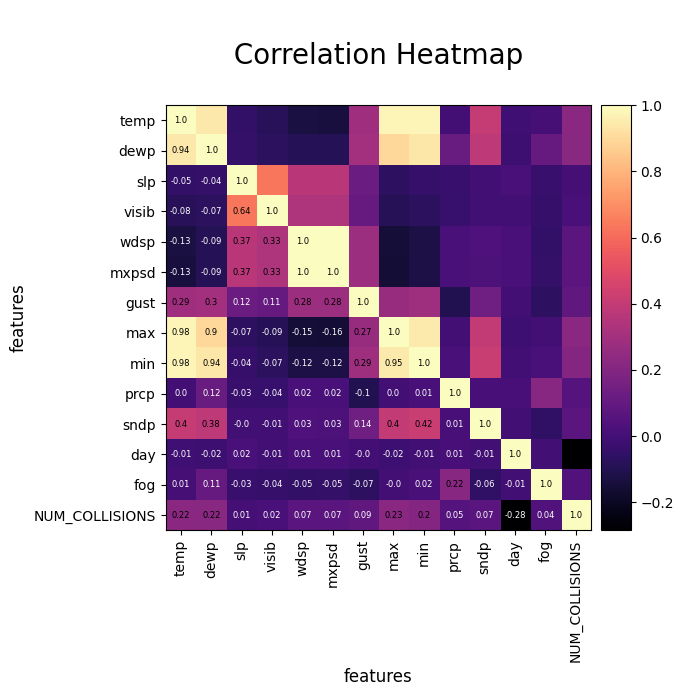

In [200]:
import matplotlib as mpl 
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig,ax = plt.subplots( 1,   figsize = (6,6)  )

correlation_matrix = df[continous_features].corr().values


heatmap = ax.imshow( correlation_matrix , cmap = 'magma') 

for i in range(len(continous_features) ): 
    for j in range(i, len(continous_features)  ): 
        if correlation_matrix[i,j] > 0.2: 
            ax.text(i,j, round(correlation_matrix[i,j], 2) , size = 6, ha = 'center' , va = 'center'  ) 
        else:
            ax.text(i,j, round(correlation_matrix[i,j], 2) , size = 6, ha = 'center' , va = 'center' , c = 'white' ) 
      # plt.text(j,i , round(correlation_matrix[i,j], 2) , size = 6, ha = 'center' , va = 'center'  ) 

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='7%', pad=0.1 ) 

fig.colorbar(heatmap, cax = cax  ) 

ax.set_xticks(np.arange(len(continous_features) ) , continous_features , rotation = 90 ) 
ax.set_yticks(np.arange(len(continous_features)) , continous_features )

ax.set_title('\n Correlation Heatmap \n ' , size = 20 )  
ax.set_xlabel('features', size = 12  ) 
ax.set_ylabel('features', size = 12  ) ; 

Given that are particularly interested in the correlation between each weather feature and the ```NUM_COLLISIONS```, we will primarly be focusing on the bottom row of our heatmap which displays each of the pairwise correlations with `NUM_COLLISIONS` 

### Looking at each of the individual positive correlations 

- ` temp ` : The the warmer the temperature perhaps there is a greater number of pedestrians out / people taking trips

- `dewp` : The higher the dew point the more moisture is the air so perhaps more humid muggy weather lead to more people using taxis rather than walking

-  `max` : The maximum temperature recorded during the day, likely because warmer weather may lead to a greater number of pedestrians as well as people taking trips around to enjoy the nice weather

- `min` : The reasoning should be similar to maximum as the two temperatures two temperature measurements are highly correlated which can be seen in the heatmap. 


### Looking at each of the individual negative correlations 

both have a negative correlation below ~-0.1 implying that there is a weak negative correlation between these variables a

- `wdsp` : The mean windspeed for the days negative correlated with the number of collisions given that perhaps days with worse weather may lead to less people taking journeys and less pedestrians


- `mmxspd` : as shown in correlation matrix the max windspeed is highly correlated with the  `wdsp` with a R2 score of 0.88

- `day` : day of the week is currently being treated as a continous feature achieves a relatively large negative R2 score when compared to the other features inside of our dataset, 

### Features with little positive or negative correlation 

Suprisingly some features like rain `prcp` which achives an R2 score of 0.05 seems to have little correlation with the total number of collisions, which seems to be counter intuitive to what you would typically expect given that rain can lower visibilty on roads, tyres have less grip etc leading to more collisions. 

In a similar vain to before you would expect a feature like `visib` which represnets the mean visibility for the day, to be highly correlated with the number of crashses given that reduced visibility can make it harder to spot other drivers on the road leading to more collisions. However, it may work the otherway as on days with low visibiilty drivesr may be more cautious as well as driving in city may aid days with low visibility. 

## Plotting the corelation between categorical features and the total number of collisions 

Commenting on the fact the day of the week is stored as a continious feature which implies that if the model learns a positive weight than tuesday is greater than monday. However this assumption is not necessarily correct and rather than storing day of the week as a continious feature it may be better to store it as a categorical feature. where the model learns a weight for each day of teh week rather than a single weight where is multiplied by the day of the week number. 



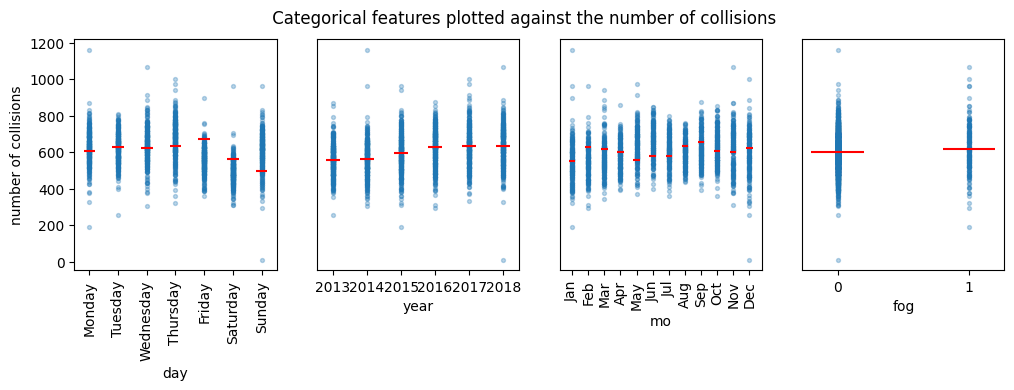

In [27]:
import math 

for feature in categorical_features:
    df[feature] = df[feature].astype('string')

n_subplots = len(categorical_features)

fig, ax = plt.subplots( 1, n_subplots , figsize = (12,  3   ) ) 


fig.suptitle(' Categorical features plotted against the number of collisions ')

xticks_dict = {'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              'mo': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']}


y_idx = 0 
for idx, categorical_feature in enumerate(categorical_features): 

    if idx == 0:
        ax[idx].set_ylabel('number of collisions') 
    else:

        ax[idx].set_yticks([])  


    if xticks_dict.get(categorical_feature):
        xticks = xticks_dict.get(categorical_feature)
        ax[idx].set_xticks(np.arange(len(xticks) ) , xticks, rotation = 90 ) 
                      
    ax[idx].set_xlabel(categorical_feature)

    
    
    ax[idx].scatter(df[categorical_feature], df.NUM_COLLISIONS, s= 8 , alpha = 0.3  ) 

    
    means = df.groupby(categorical_feature)['NUM_COLLISIONS'].mean()
    for i,mean in enumerate(means):
        ax[idx].hlines(mean, i - 0.2, i + 0.2,  color = 'red'   ) 


    if idx % 2 == 0: 
        y_idx = +1 

The scatter plots show the spread and the mean number of collisions per category. 

-  `day` : The mean number of collisions rises gradually through the week until friday where it shoots up and then falls back down again on saturday and sunday. This is likely a result of less people driving on the weekends due to less commuting. Friday is a mix of commuting as well more social events etc. 

-  `year` : We can see that tehre has been a gradual rise in the mean number of collisions each year with it started to plateu between 2017/2018. 

- `mo` : the mean number of collisions seems to fluctuate throught the months with Septemer with the highest mean collisions, more peole back to school still good weather etc, with january having the lowest mean as less activities worse weather may contribute to more people staying iside etc. 

- `fog` : We can see that the mean number of collisions is marginally higher when foggy represented by 1, which is to expected given that the foggier it the less vibility you have leading to less reaction time and more accidents. 

(generally need to comment on the spread here too ) 

We want to compare this performance against one hot encodings. 

## Sine transform to day of week feature. 

From looking at the patterns in the number of crashes  when compared to the day of the week, we can observe some level of wave/ sinosid like behaviour as the number of collisions rises until friday and then falls on both saturday and sunday. This pattern is vaguely similar to a sine wave between $(0, \pi)$, which I have plotted below. 

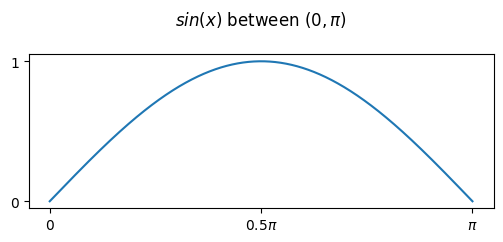

In [28]:
plt.figure(figsize = (6,  2 ) ) 
xvals = np.linspace(0, np.pi, 10000 ) 
yvals = np.sin(xvals) 
plt.plot(xvals, yvals ) 
plt.xticks([0, np.pi /2 , np.pi  ] , ['0' , '$0.5\pi$',  '$\pi$'] ); 
plt.yticks([1, 0  ] )
plt.title('$sin(x)$ between $(0,\pi)$ \n'  ); 

As a result in order to improve the correlation between day of week stored as a continous feature and the number of collisions ina  day, we can apply the following sine transformation: 

$$ \hat{x} = sin \left(\frac{x\times{\pi}}{n } \right)$$

where $x$ is the day of week, $n$ is 7 the number of days in a week and $\hat{x}$ is our transformed value. 

Below is a graph displaying the sine transformation of days of week described above, where the height of day of week represents its new value. 

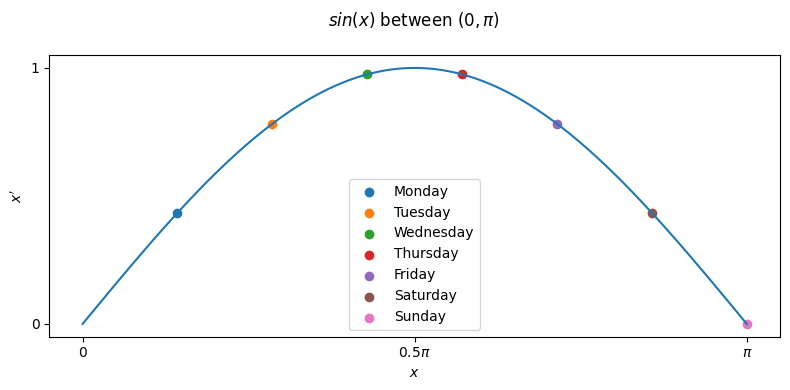

In [29]:
plt.figure(figsize = (8, 4  ) ) 
xvals = np.linspace(0, np.pi, 10000 ) 
yvals = np.sin(xvals) 
plt.plot(xvals, yvals ) 
plt.xticks([0, np.pi /2 , np.pi  ] , ['0' , '$0.5\pi$',  '$\pi$'] ); 
plt.yticks([1, 0  ] )
plt.title('$sin(x)$ between $(0,\pi)$ \n'  )
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ] 
for idx, day in enumerate(days_of_week):
    xval = (idx + 1 ) * (np.pi / 7)
    yval = np.sin(xval) 
    plt.scatter( xval, yval  , label =  day )

plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.tight_layout() 
plt.legend(); 

From looking at the graph we can see that our sine transformation doesnt represent the relationship between day of week and no. collisions perfectly, given that it shows wednesday and thursday with the highest transformed values compared to collision data where friday is the day of week is the highest number of collisions. However, it still captures the rough trend in the data and should hence lead to an improvement in the correlation between day of week and total number of collisions. 

Calculating the correlation coefficient between our sine transformed day of week feature and total number of collisions. 

In [30]:
df.day = df.day.astype('int') 
day_sine = df.day.apply( lambda x : np.sin(  np.pi  * ( x / 7 ) )  ) 
float(round(np.corrcoef(day_sine, df.NUM_COLLISIONS)[0][1], 2)) 

0.46

The sine transform led to an increase in the correlation between our day of week feature and the total number of collisions from ~-0.26 to ~0.46, so not only have we impacted the strength of the correlation between the two variables but we have also adjusted the direction of the correlation.

### Hot encoding day of week feature

Despite transforming the day of week feature using a sine curve to better match the rise and fall of collisions during the week, it may be more sensible to encode the day of the week feature using one hot encodings, where we create a seperature feature for each individual day of week where 1 indiciates if a particular row corresponds to a given day of the week. 

In [ ]:
days_of_week_df = pd.get_dummies(df.day ).astype('int') 
days_of_week_df['collisions'] = df.NUM_COLLISIONS
days_of_week_df.head() 


In [34]:
days_of_week_df.corr().loc[:, ['collisions'] ] 

,collisions
1,0.004239
2,0.098392
3,0.075471
4,0.134544
5,0.286025
6,-0.168215
7,-0.430455
collisions,1.000000


Above I've printed a table of the pmcc correlation coeficient between each day of week and the total number of collisions. 

# Regression Analysis 

Training a linear regression to predict `NUM_COLLISIONS` using our weather and time based features, which will be used by an insurance company to forecast the number of collisions on a given day allowing them to price risk of their insurance accordingly. 

The Linear Regression model should learn the linear correlations between the features in the dataset and the target variable, which was explored above, in order to predict the total number of collisions for a given day. 

In [113]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score 

printing the first 5 rows of our dataset 


In [108]:
df.head() 

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,999.9,0,381
1,3,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,999.9,0,480
2,4,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,999.9,0,549
3,5,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,999.9,0,505
4,6,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,999.9,0,389


Given the context of the car insurance company looking to predict the total number of collisions in a given day so that they can price the associated risk correctly, there are a couple features which are worth dropping from our dataframe as they would not be available in a real world scenario. 

Training a linear regression model with `collision_date` will result in a learnt weight for each individual day inside of the datase. The insurance company is interested in forecasting the number of collisions in the future which the model as no `collision_date` weights for. 

A similar approach can be taken to the `year` column and it can force the model to learn the average behaviour over a given year, but wont be useful for predicting `NUM_COLLISIONS` for future years. 

`da` which represents day of the month will also be removed given that it is likely to be random noise

`NUM_COLLISIONS` as if it were available then there would be no need to predict it. 

In [ ]:
# Dropping features mentioned above
X_df = df.drop( [ 'year', 'da',  'collision_date', 'NUM_COLLISIONS'] ,  axis = 'columns' ) 


Calling `pd.get_dummies` which will create one encodings for all categorical features in our dataframe  e.g. `day` `month` `fog` etc. 

In [ ]:
# Converting our day feature to string as get_dummies recognises categroical features by the string dtype 
X_df.day = X_df.day.astype('str') 

#creating our feature matrix X and target vector y
X = pd.get_dummies(X_df)
y = df['NUM_COLLISIONS']

Printing the first 5 rows of our feature matrix $X$

In [35]:
X.head()

,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,...,mo_2,mo_3,mo_4,mo_5,mo_6,mo_7,mo_8,mo_9,fog_0,fog_1
0,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,...,False,False,False,False,False,False,False,False,True,False
1,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,...,False,False,False,False,False,False,False,False,True,False
2,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,...,False,False,False,False,False,False,False,False,True,False
3,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,...,False,False,False,False,False,False,False,False,True,False


### Splitting out training and testing data 

Creating train test split using sklearns `train_test_split` function, with a `test_size` of 0.2 and `random_state` of 42. 

In [ ]:

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y , test_size = 0.2, random_state = 42 ) 

Initialising our Linear Regression model with default parameters and fitting it to our training data. 

In [38]:
lr = LinearRegression() 
lr.fit(Xtrain, ytrain) 

LinearRegression()

## Visualling predictions 

Plotting 20 predictions which have been randomly sampled from our test set to get a feel for the models predictions. 

In [140]:
import random 

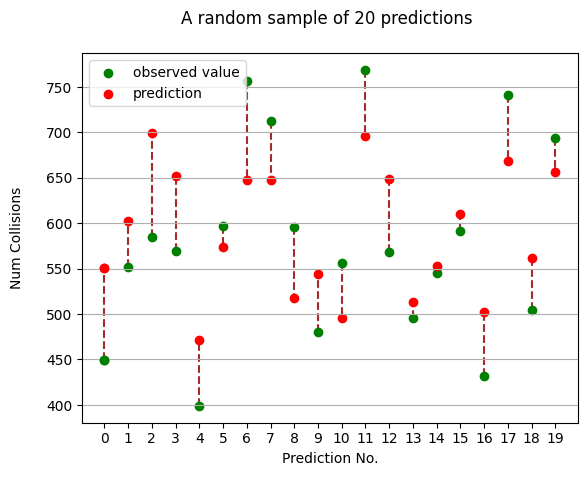

In [198]:
predictions = list(zip(ytest, lr.predict(Xtest)) ) 
predictions_sample = random.sample(predictions, 20 ) 

for idx, (ground_truth, prediction) in enumerate(predictions_sample):
        
        idx = str(idx)
        plt.plot( [idx, idx] , [ground_truth, prediction ], c = 'brown', linestyle = '--', zorder = 1 ) 

        plt.scatter(idx, ground_truth, c = 'green' ) 
        plt.scatter(idx, prediction, c = 'red' ) 

        if idx == '0':
                plt.scatter(idx, ground_truth, c= 'green' , zorder = 2, label = 'observed value') 
                plt.scatter(idx, prediction, c = 'red' , zorder = 2 , label = 'prediction' ) 

plt.grid(axis = 'y' )
plt.xlabel('Prediction No.\n')
plt.ylabel('Num Collisions\n')
plt.title('A random sample of 20 predictions \n' )
plt.legend(); 



Above is only a sample of 20 predictions samples so it not is wholly representative of the models performance across the entire test set. However, it allows us to  visualise the gap between predictions and observed values so we can get a feel for the models performance. 



## Computing Metrics 

In [ ]:
mse = mse(ytest, lr.predict(Xtest) ) 
r2 = r2_score(ytest, lr.predict(Xtest)) 
print(f' Mean Squared Error: {mse}, R Squared Score: {r2}')

 Mean Squared Error: 5948.267617700371, R Squared Score: 0.35466099112940164


An R2 score of ~35% of means the Linear Regression model with the set of features avaiable was able to capture ~35% of the total variance which exists inside of the distribution of number of collisions. 

 Another Interpretation of the R2 score, is that it represents the the percentage improvement in Mean Squared Error that the model achieves when compared to simply predicting the mean, in this case it would be predicting the mean number of total collisions across the dataset for each sample. 

We can confidently say that our model was able to learn some of the patterns between our weather/time features and the total number of collisions on a given day. However, ~ 65% of the variance is left unexplained which is likely the result of numerous factors I've listed a few below:

- External features which are correlated with `NUM_COLLISIONS` not being included within our dataset. E.g. the design of roads, special holidays

-  Linear Regression is not able to learn non linear relationships which likely exist between our features and `NUM_COLLISIONS`

-  Car collisions are a result of random chance and will likely remain somewhat unpredictable. 


## Investigating Feature Weights 

One advantage of using Linear Regression is its interpretability. A Linear Regression model learns a weight for each feature it is trained on, this makes it easier to understand how each individual feature contributes to the final prediction. 

### Plotting feature weights 

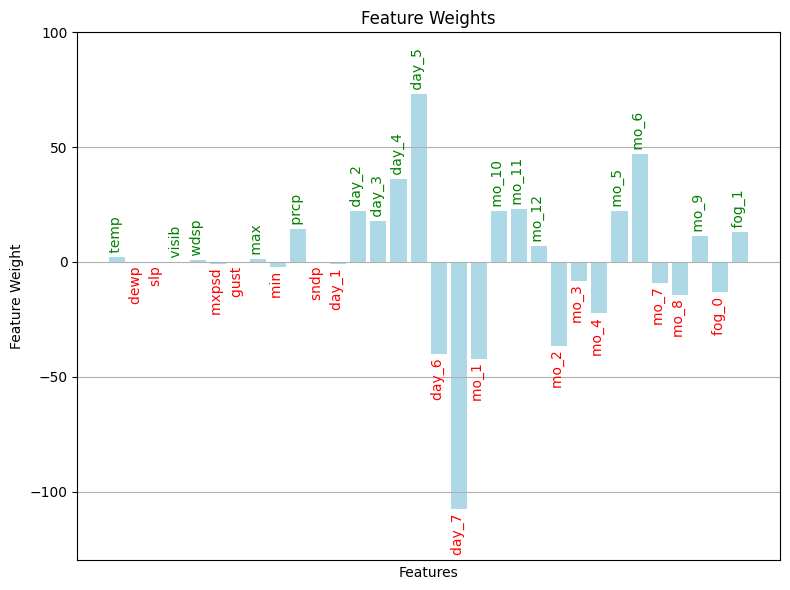

In [107]:
feature_weights = dict(zip(X.columns, lr.coef_ ))
plt.figure(figsize=(8, 6))

plt.bar(np.arange(len(feature_weights)), feature_weights.values(), align = 'edge', color = 'lightblue') 
plt.xticks([])
# plt.xticks(np.arange(len(feature_weights)) , feature_weights.keys() , rotation = 90 ); 
for idx, (key,value) in enumerate(feature_weights.items() ):
    if value > 0: 
        plt.text(idx, value, s  = f' {key}', rotation = 90 ,ha = 'left' , va = 'bottom', c = 'green')
    else: 
         plt.text(idx, value, s  = f'{key} ', rotation = 90 ,ha = 'left' , va = 'top', c = 'red' )

plt.ylim(-130, 100 )
plt.grid() 
plt.title('Feature Weights') 
plt.xlabel('Features') 
plt.ylabel('Feature Weight')
plt.tight_layout() 

Each model weight provides information on the importance of each feature to the model which can be gauged by the magnitude of its weight, as well as the direction of correlation which is determined by the sign of the weight. 


From the graph it can be seen that the most important feature / set of features is the `day` of week features, Each of these features have a relatively large weight attached to them , in particuluar the feature `day_7` which represents Sunday has the largest weight across al features around - 110. Its worth noting that this feature weight corresponds to scatter plot of `day` of week against `NUM_COLLISIONS` where Sunday achieves the lowest mean `NUM_COLLISIONS` and displays the most left skewed distribution out of all days. 

Similar to the weekly patterns we can see that our second most important feature/set of features is `mo` of year, with months like June represented by `mo_6` has a weight ~50 etc, this weight also correponds to the scatter plot between `mo` and `NUM_COLLISIONS`. 

Despite the time based features `day` and `mo` being mostly highly prioritised by the model, some weather based features such as `fog` and `prcp` have relatively large weights and beat out some of the features relating to time such as `day_1` (Monday) and `mo_7` (July). 


## Comments 

Overall, from the achieved R2 score as well as observing a set of predictions we can say that our model generaly performs quite poorly at predicting `NUM_COLLISIONS`,  I believe that the poor model accuracy also reflects the nature the problem given that car crashes are determiend by human behaviour which can be influenced by some of the factors in our dataset but not remains extremly difficult to predict. 

Time based features such as day of week and month seem to be far more predictive of `NUM_COLLISIONS` when compared to weather based features, Its also worth noting that our accuracy scores can somewhat be seen as an upperbound given in practice when predicting the total number of collisions tomorrow we will have to make use of forecasted whether data which can increased our margin for error and hurt the accuracy of our model. 

Accuracy could potentially be improved by using a more complex model such as Suport Vector Regression or a Neural Network which are able to learn non linear relations and potentially capture a greater amount of the complexity which exists within the data. Also, extra features could be added such as ...., Also the existing data could be cleaned of outliers e.g. removing public holidays etc which have inflated traffic volumes leading to more collisions but this not reflective in the data so may confuse the model etc.  

Also taking a step back for a second, despite lacking data on the total number of drivers on a given day perhaps it would be more useful to predict the rate / % chance of a collision on a given day for the insurance company rather than the raw number of collisions. As a higher total number of collisions doesnt necessarily mean a greater insurance risk instead it could simly be a result of more drivers on the road.

# Tast 3 

One usecase where the module learnings could be applied at work is in metadata driven recommendation systems, which leverage metadata to learn numerical/vector represenations for shows/movies. 

Some examples of metadata which may be features inside of a content based recommender system include a shows/movies genre, format, rating, duratin, age rating etc, I could apply the module learnings around feature correlation(K5/ S1) to explore the correlations between model features to ensure that my features are not highly correlated to each other. As, if two features are highly correlated with each other then they likely contain similar information making one of them redundant as our model will likely achieve the same/similar performance with only one of them. 

This module could help me make more informed decisions around feature engineering(S2) as it is has improved my understanding around correlation which can be applied to selecting model features. 